## Code Reference:
https://pytorch.org/tutorials/beginner/basics/data_tutorial.html
https://pytorch.org/tutorials/beginner/basics/data_tutorial.html

In [1]:
import torch
import numpy as np

C:\Users\Priyanka\anaconda3\envs\pytorch\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Tensor Initialization

In [2]:
#From direct data 

data = [[1,2],[3,4]] #list
tensor_data = torch.tensor(data)
print(f"data = {data} \ntensor = {tensor_data}")

data = [[1, 2], [3, 4]] 
tensor = tensor([[1, 2],
        [3, 4]])


In [3]:
#From numpy array

np_array = np.array(data)
tensor_np = torch.from_numpy(np_array)
print(f"np_array = {np_array} \ntensor = {tensor_np}")

np_array = [[1 2]
 [3 4]] 
tensor = tensor([[1, 2],
        [3, 4]], dtype=torch.int32)


In [4]:
#From other Tensors

tensor_2 = torch.ones_like(tensor_data)
tensor_3 = torch.rand_like(tensor_data, dtype = torch.float)

print(f"tensor 2 = {tensor_2} dtype = {tensor_2.dtype} \ntensor 3 = {tensor_3} dtype = {tensor_3.dtype}")

tensor 2 = tensor([[1, 1],
        [1, 1]]) dtype = torch.int64 
tensor 3 = tensor([[0.4671, 0.1727],
        [0.6530, 0.8421]]) dtype = torch.float32


In [5]:
#Initializing tensor with random/constant values

#Give shape as input in tuple form
shape=(2,3)

rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random tensor: \n{rand_tensor} \nOnes Tensor: \n{ones_tensor} \nZeros Tensor: \n{zeros_tensor}\n")

Random tensor: 
tensor([[0.7025, 0.1419, 0.2721],
        [0.1701, 0.3618, 0.7869]]) 
Ones Tensor: 
tensor([[1., 1., 1.],
        [1., 1., 1.]]) 
Zeros Tensor: 
tensor([[0., 0., 0.],
        [0., 0., 0.]])



## Tensor Attributes

In [6]:
#Shape, Device and Dtype

tensor = torch.rand(2,3)

print(f"Shape = {tensor.shape}")
print(f"Data Type = {tensor.dtype}")
print(f"On Device = {tensor.device}")

Shape = torch.Size([2, 3])
Data Type = torch.float32
On Device = cpu


## Operations on Tensors

In [7]:
#Identify the device available

if torch.cuda.is_available(): 
    print("Cuda available")
    tensor = tensor.to("cuda")
    device = 'cuda'
else:
    print("Cuda Not Available")
    print("Running on cpu")
    device = 'cpu'


Cuda available


In [8]:
#Standard indexing and slicing

tensor = torch.rand(4,4)
print(f"Original Tensor: \n{tensor}\n")

print(f"First Row: \n{tensor[0,:]}\n")
print(f"First Column: \n{tensor[:,0]}\n")
tensor[0:2,0:2]=0 #column index two not modified
print(f"Modified tensor: \n{tensor}\n")

Original Tensor: 
tensor([[0.8360, 0.8097, 0.1993, 0.1877],
        [0.6774, 0.6066, 0.9775, 0.5161],
        [0.9230, 0.0203, 0.8037, 0.8817],
        [0.9218, 0.5419, 0.5187, 0.1815]])

First Row: 
tensor([0.8360, 0.8097, 0.1993, 0.1877])

First Column: 
tensor([0.8360, 0.6774, 0.9230, 0.9218])

Modified tensor: 
tensor([[0.0000, 0.0000, 0.1993, 0.1877],
        [0.0000, 0.0000, 0.9775, 0.5161],
        [0.9230, 0.0203, 0.8037, 0.8817],
        [0.9218, 0.5419, 0.5187, 0.1815]])



In [9]:
#Joining tensors

t1 = torch.cat([tensor, tensor], dim = 1)
print(f"Tensors concat along dimension 1: \n{t1}\n")

t2 = torch.cat([tensor,tensor], dim = 0)
print(f"Tensors concat along dimension 0: \n{t2}\n")

Tensors concat along dimension 1: 
tensor([[0.0000, 0.0000, 0.1993, 0.1877, 0.0000, 0.0000, 0.1993, 0.1877],
        [0.0000, 0.0000, 0.9775, 0.5161, 0.0000, 0.0000, 0.9775, 0.5161],
        [0.9230, 0.0203, 0.8037, 0.8817, 0.9230, 0.0203, 0.8037, 0.8817],
        [0.9218, 0.5419, 0.5187, 0.1815, 0.9218, 0.5419, 0.5187, 0.1815]])

Tensors concat along dimension 0: 
tensor([[0.0000, 0.0000, 0.1993, 0.1877],
        [0.0000, 0.0000, 0.9775, 0.5161],
        [0.9230, 0.0203, 0.8037, 0.8817],
        [0.9218, 0.5419, 0.5187, 0.1815],
        [0.0000, 0.0000, 0.1993, 0.1877],
        [0.0000, 0.0000, 0.9775, 0.5161],
        [0.9230, 0.0203, 0.8037, 0.8817],
        [0.9218, 0.5419, 0.5187, 0.1815]])



In [10]:
#Arithmetic: Matrix Multiplication

tensor_matmul1 = tensor @ tensor.T
#OR
tensor_matmul2 = tensor.matmul(tensor.T) #.T is a crucial part else it will multiply a square matrix as is
#OR
tensor_matmul3 = torch.ones_like(tensor_matmul1) #intializing is crucial
torch.matmul(tensor, tensor.T, out = tensor_matmul3)
print(f"Method 1: \n{tensor_matmul1}\n Method 2: \n{tensor_matmul2}\n Method 3: \n{tensor_matmul3}\n")

Method 1: 
tensor([[0.0750, 0.2917, 0.3257, 0.1375],
        [0.2917, 1.2218, 1.2406, 0.6006],
        [0.3257, 1.2406, 2.2756, 1.4386],
        [0.1375, 0.6006, 1.4386, 1.4453]])
 Method 2: 
tensor([[0.0750, 0.2917, 0.3257, 0.1375],
        [0.2917, 1.2218, 1.2406, 0.6006],
        [0.3257, 1.2406, 2.2756, 1.4386],
        [0.1375, 0.6006, 1.4386, 1.4453]])
 Method 3: 
tensor([[0.0750, 0.2917, 0.3257, 0.1375],
        [0.2917, 1.2218, 1.2406, 0.6006],
        [0.3257, 1.2406, 2.2756, 1.4386],
        [0.1375, 0.6006, 1.4386, 1.4453]])



In [11]:
#Arithmetic: Elementwise multiplication

tensor_elemul1 = tensor * tensor
#OR
tensor_elemul2 = tensor.mul(tensor)
#OR
tensor_elemul3 = torch.zeros_like(tensor_elemul1)
torch.mul(tensor, tensor, out = tensor_elemul3)

print(f"Method 1: \n{tensor_elemul1}\n Method 2: \n{tensor_elemul2}\n Method 3: \n{tensor_elemul3}\n")

Method 1: 
tensor([[0.0000e+00, 0.0000e+00, 3.9737e-02, 3.5239e-02],
        [0.0000e+00, 0.0000e+00, 9.5547e-01, 2.6634e-01],
        [8.5186e-01, 4.1085e-04, 6.4593e-01, 7.7735e-01],
        [8.4974e-01, 2.9366e-01, 2.6900e-01, 3.2926e-02]])
 Method 2: 
tensor([[0.0000e+00, 0.0000e+00, 3.9737e-02, 3.5239e-02],
        [0.0000e+00, 0.0000e+00, 9.5547e-01, 2.6634e-01],
        [8.5186e-01, 4.1085e-04, 6.4593e-01, 7.7735e-01],
        [8.4974e-01, 2.9366e-01, 2.6900e-01, 3.2926e-02]])
 Method 3: 
tensor([[0.0000e+00, 0.0000e+00, 3.9737e-02, 3.5239e-02],
        [0.0000e+00, 0.0000e+00, 9.5547e-01, 2.6634e-01],
        [8.5186e-01, 4.1085e-04, 6.4593e-01, 7.7735e-01],
        [8.4974e-01, 2.9366e-01, 2.6900e-01, 3.2926e-02]])



In [12]:
#Single Element tensors 

agg = tensor.sum()
agg_item = agg.item() #itmeize the tensor 
print(agg, agg_item, type(agg_item)) #type() for non array items

tensor(6.6731) 6.673055648803711 <class 'float'>


In [13]:
#Aritmetic: In place operations

print(f"Original tensor: \n{tensor}\n")
tensor.add_(5) #tensor.add_(num) the underscore is important
print(f"Added 5 to the tensor: \n{tensor}\n")

Original tensor: 
tensor([[0.0000, 0.0000, 0.1993, 0.1877],
        [0.0000, 0.0000, 0.9775, 0.5161],
        [0.9230, 0.0203, 0.8037, 0.8817],
        [0.9218, 0.5419, 0.5187, 0.1815]])

Added 5 to the tensor: 
tensor([[5.0000, 5.0000, 5.1993, 5.1877],
        [5.0000, 5.0000, 5.9775, 5.5161],
        [5.9230, 5.0203, 5.8037, 5.8817],
        [5.9218, 5.5419, 5.5187, 5.1815]])



## Tensor and Numpy

In [14]:
#From Tensor to array

t = torch.ones(5)
n = t.numpy() #converting tensor into an np array and storing in a different variable
print(f"Before Tensor: \n{t} \nBefore Nparray: \n{n}\n")
t.add_(1)
print(f"After Tensor: \n{t} \nAfter Nparray: \n{n}\n")

#The numpy array and tensor share the same memory space hence any change in 
#one is reflected in the other!

Before Tensor: 
tensor([1., 1., 1., 1., 1.]) 
Before Nparray: 
[1. 1. 1. 1. 1.]

After Tensor: 
tensor([2., 2., 2., 2., 2.]) 
After Nparray: 
[2. 2. 2. 2. 2.]



In [15]:
#From Np Array to Tensor

n = np.ones(5)
t = torch.from_numpy(n)
print(f"Before Nparray: \n{n} \nBefore Tensor: \n{t}\n")
np.add(n, 1, out = n)
print(f"After Nparray: \n{n} \nAfter Tensor: \n{t}\n")

t.add_(1)
print(f"After Tensor: \n{t} \nAfter Nparray: \n{n}\n")

#Works both ways!

Before Nparray: 
[1. 1. 1. 1. 1.] 
Before Tensor: 
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)

After Nparray: 
[2. 2. 2. 2. 2.] 
After Tensor: 
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)

After Tensor: 
tensor([3., 3., 3., 3., 3.], dtype=torch.float64) 
After Nparray: 
[3. 3. 3. 3. 3.]



## Datasets and DataLoaders

In [39]:
#import torch
#import numpy as np
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [23]:
#Importing form a pre available data set GTSRB

#dir(datasets) #to check the available datasets

#CIFAR10: 60000 images of size 32X32 split into 50000 train and 10000 test 
#images. 5 training batches of 10000 each. 1000 rnadomly selected images from 
#each class constitute the test dataset. 
#https://www.cs.toronto.edu/~kriz/cifar.html


training_data = datasets.CIFAR10(root = 'data_Cifar10',
                              train = True,
                              download = True,
                              transform = ToTensor()
                              )

testing_data = datasets.CIFAR10(root = 'data_Cifar10',
                             train = False,
                             download = True,
                             transform = ToTensor()
                             )

170500096it [01:38, 1731922.00it/s]                                                                                    


Extracting data_Cifar10\cifar-10-python.tar.gz to data_Cifar10
Files already downloaded and verified


<function matplotlib.pyplot.show(*args, **kw)>

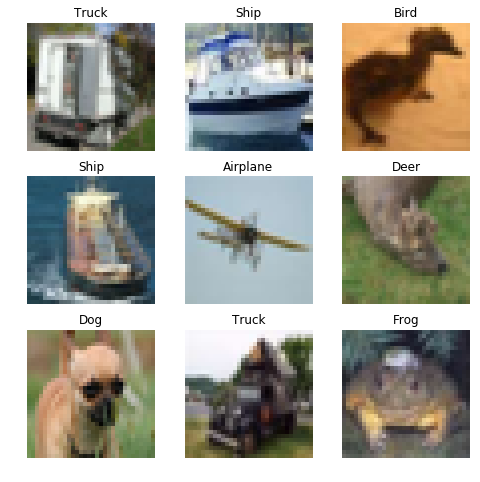

In [33]:
#Visualizing using matpltlib

import matplotlib.pyplot as plt

labels_map = {
    0: 'Airplane',
    1: 'Automobile',
    2: 'Bird',
    3: 'Cat',
    4: 'Deer',
    5: 'Dog',
    6: 'Frog',
    7: 'Horse',
    8: 'Ship',
    9: 'Truck'
}

figure = plt.figure(figsize = (8, 8))
cols, rows = 3, 3
for i in range(1, cols*rows+1):
    sample_idx = torch.randint(len(training_data), size = (1, )).item()
    img, label = training_data[sample_idx]
    img = img.numpy()
    img = np.transpose(img,(1, 2, 0)) #rolls the axis and gets the transpose
    #this is essential as Cifar images are in form (3 32 32)
    #we need them to be in (32, 32, 3) to display
    img = torch.from_numpy(img)
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis('off')
    plt.imshow(img.squeeze(), cmap = 'gray')
plt.show


In [38]:
#Creating my own dataset

#NEED TO CHECK 

import os
import pandas as pd
from torchvision.io import read_image

class CustomDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform = None, target_tansform = None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
        
    def __len__(self):
        return len(self.img_labels)
    
    def __getitem__(self, idx):
        img_path = os.path.join(seld.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label =self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

Training feature shape: torch.Size([60, 3, 32, 32])
Training flabels shape: torch.Size([60])


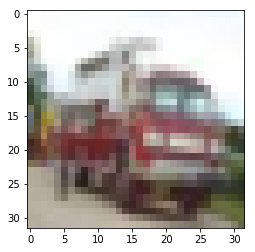

Label: Truck


In [47]:
#Dataloader

training_dataloader = DataLoader(training_data, batch_size = 60, shuffle = True)
test_dataloader =DataLoader(testing_data, batch_size = 60, shuffle = True)

train_features, train_labels = next(iter(training_dataloader))
print(f"Training feature shape: {train_features.shape}")
print(f"Training flabels shape: {train_labels.shape}")

img = torch.from_numpy(np.transpose(train_features[0].numpy(),(1, 2, 0))).squeeze()
label = train_labels[0].item()
plt.imshow(img, cmap = 'gray')
plt.show()
print(f"Label: {labels_map[label]}")